Dissertation
    
# **Notebook 5: Nowcasting/Point of Interest Data Preperation**
    
This notebook will read in and prepare POI data.

***

In [1]:
# Set up 

import pandas as pd
import os 
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns

In [2]:
# Set directory 

poi_data = os.path.join("Data", "POI")

shapefiles = os.path.join("Shapefiles")

nc = os.path.join("Data", "Now-Casting")

In [3]:
os.getcwd()

'/home/jovyan/work/OneDrive/UCL/Dissertation/Notebooks V3'

In [4]:
def infodf(dataframe):
    print(f"There are "+str(len(dataframe)) + " rows in the dataframe")
    print(f"There are " + str(dataframe.shape[1]) + " columns in the data frame")
    print(f"The columns of the dataframe are: " + str(dataframe.columns))
    print(f"There are " + str(dataframe.isnull().sum().sum()) + " NaN values in the data frame")
    print(f"These NaN values are located in columns: " + str(dataframe.columns[dataframe.isnull().any()].tolist()))

In [5]:
# Read in spatial data

lsoa_2011 = gpd.read_file(os.path.join("shapefiles", "LSOA_KENT_2011.shp"))

In [6]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

1.1 2014

In [7]:
poi_2014_kent = gpd.read_file(os.path.join(nc, "poi_2014.gpkg"))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [8]:
# Rename

poi_2014_kent = poi_2014_kent.rename(columns={"groupname":"Level_1", "categoryname":"Level_2", "classname":"Level_3"})

In [9]:
infodf(poi_2014_kent)

There are 98322 rows in the dataframe
There are 33 columns in the data frame
The columns of the dataframe are: Index(['id', 'ref_no', 'name', 'pointx_class', 'Level_1', 'Level_2', 'Level_3',
       'feature_easting', 'feature_northing', 'pos_accuracy', 'uprn',
       'topo_toid', 'topo_toid_version', 'itn_easting', 'itn_northing',
       'itn_toid', 'itn_toid_version', 'distance', 'address_detail',
       'street_name', 'locality', 'geographic_county', 'postcode',
       'verified_address', 'admin_boundary', 'telephone_number', 'url',
       'brand', 'qualifier_type', 'qualifier_data', 'provenance',
       'supply_date', 'geometry'],
      dtype='object')
There are 640986 NaN values in the data frame
These NaN values are located in columns: ['uprn', 'address_detail', 'street_name', 'locality', 'telephone_number', 'url', 'brand', 'qualifier_type', 'qualifier_data']


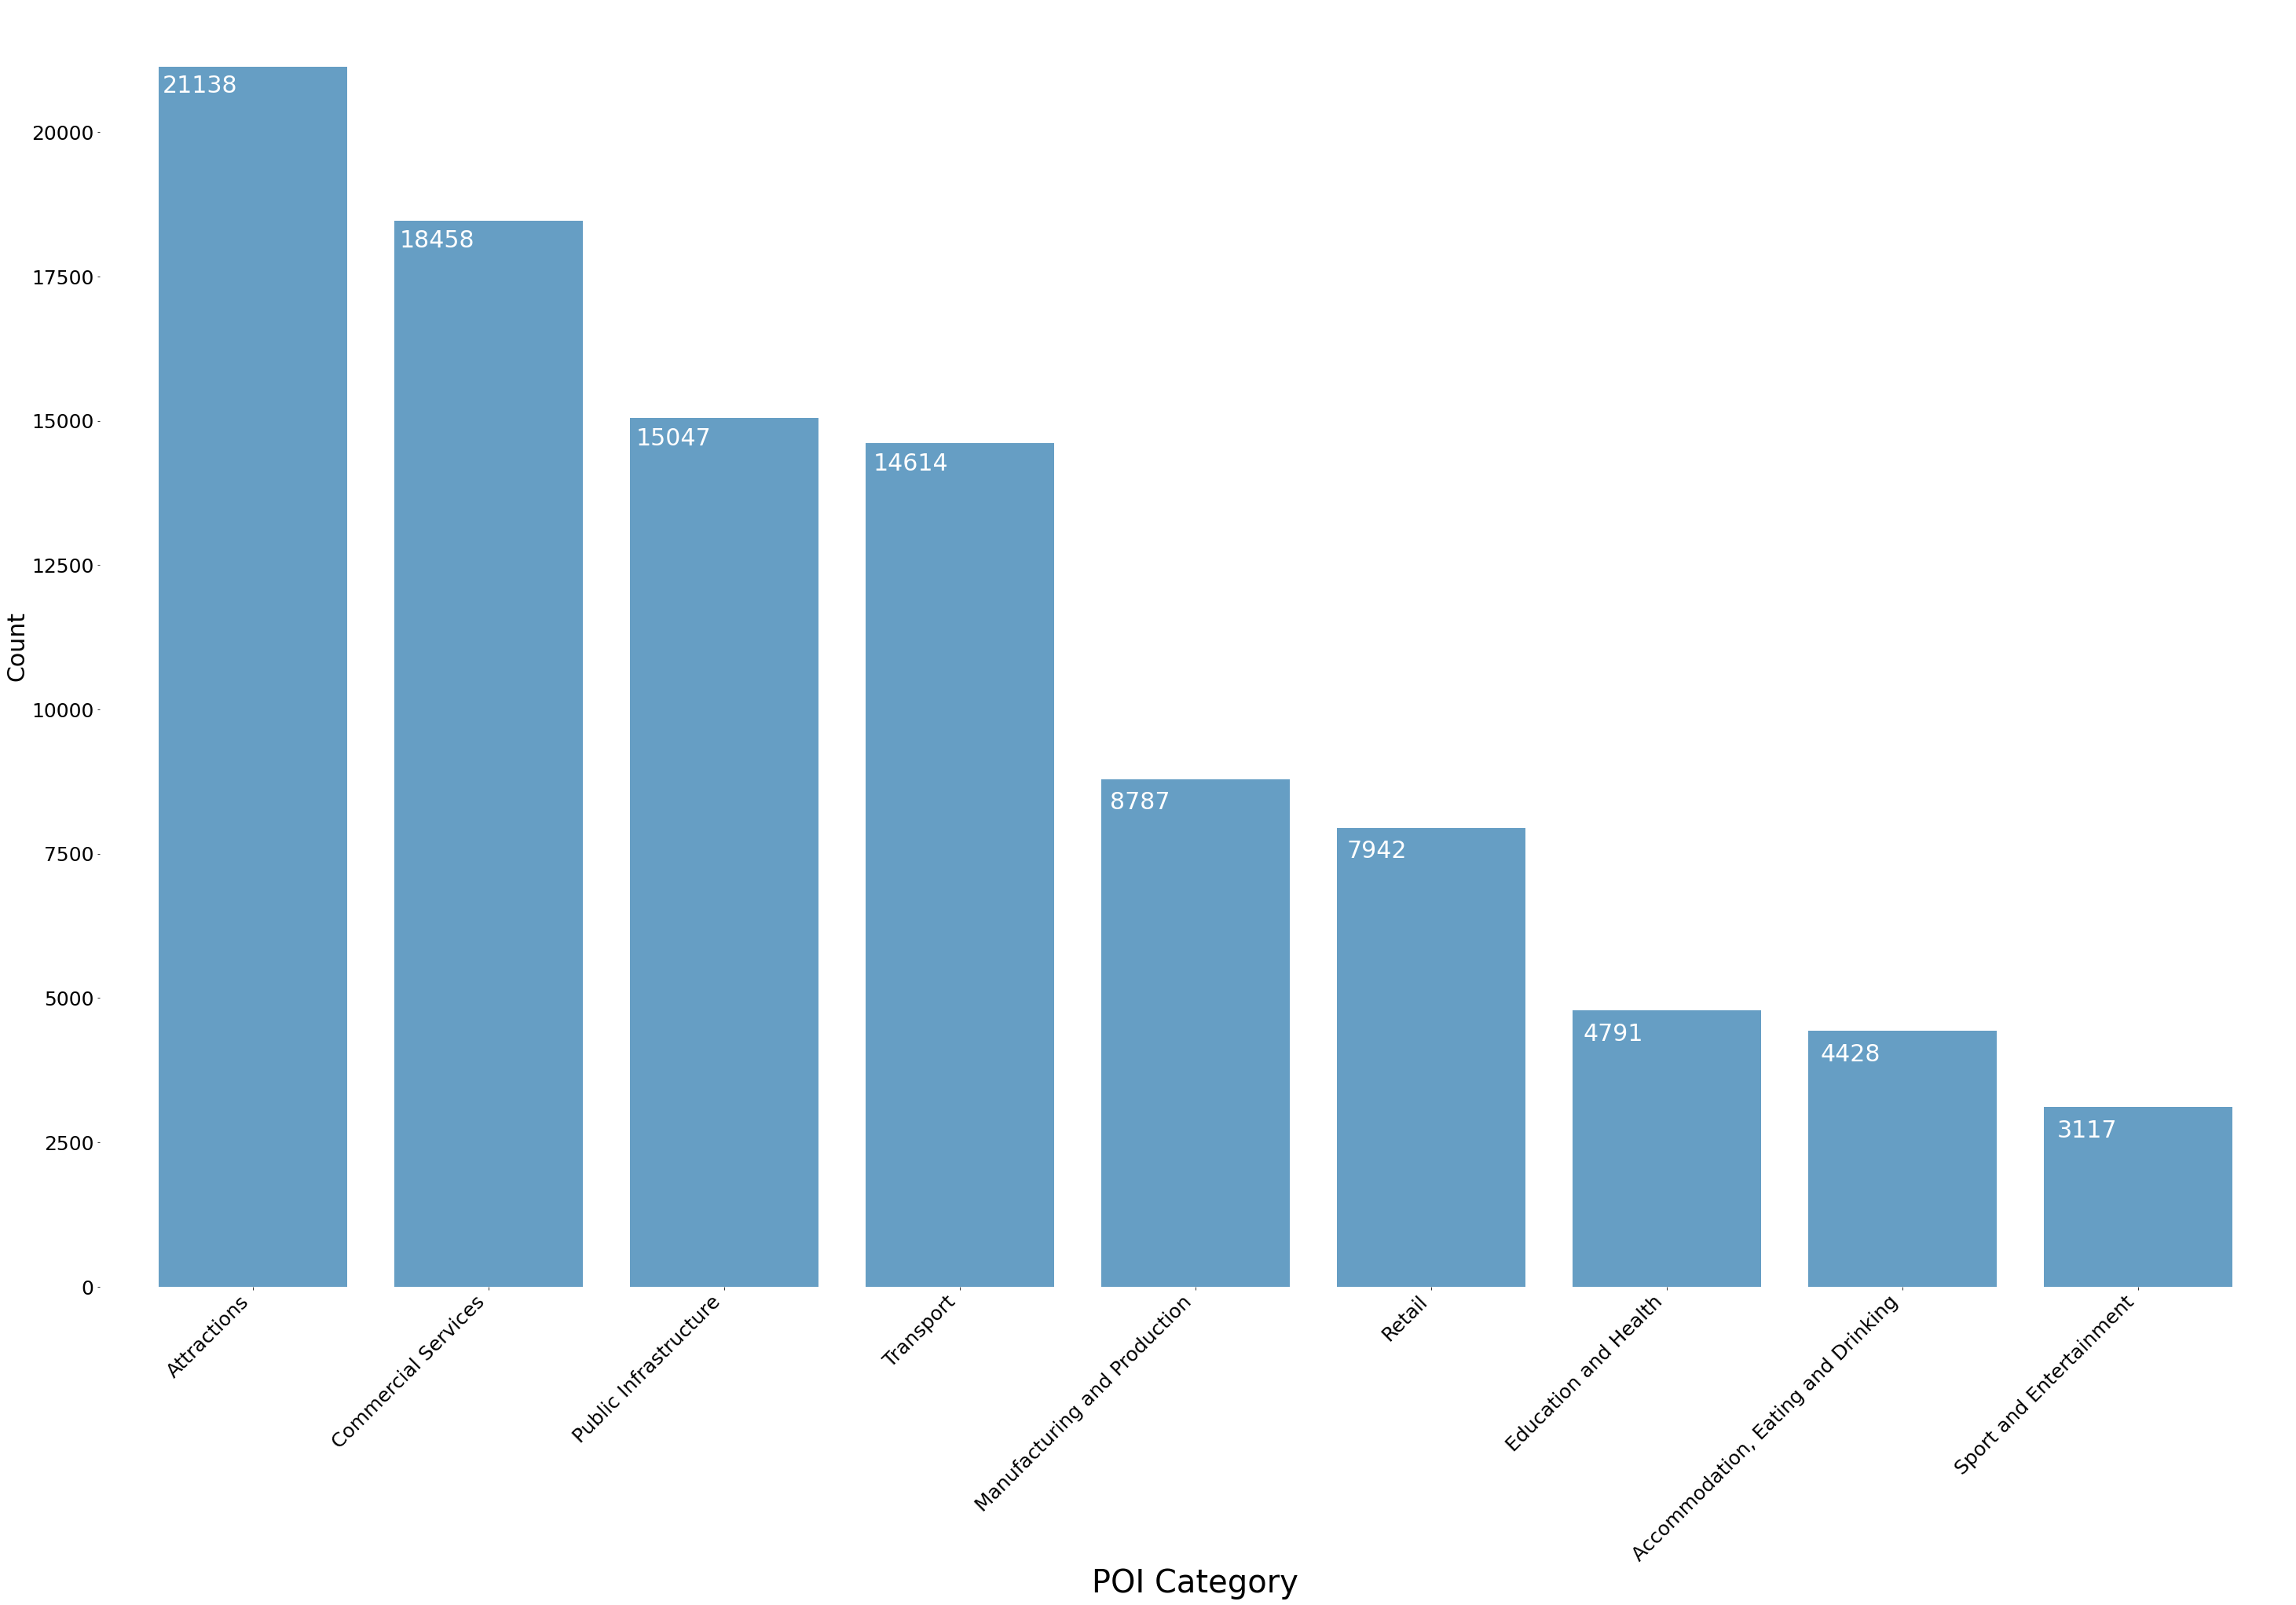

In [10]:
# Now lets explore it 

poi_2014_kent_sum_1 = pd.DataFrame(poi_2014_kent.groupby(["Level_1"])["name"].count()).reset_index()
poi_2014_kent_sum_1 = poi_2014_kent_sum_1.rename(columns={"name":"count_2014"})
poi_2014_kent_sum_1 = poi_2014_kent_sum_1.sort_values(by="count_2014", ascending=False)

fig, ax = plt.subplots(figsize =(50,30))
poi_2014_kent_sum_1.plot.bar(ax=ax, legend=False, width=0.8, color=("#669EC4"))
ax.set_xlabel("POI Category", fontsize=40)
ax.set_ylabel("Count", fontsize=30)
ax.set_xticklabels(poi_2014_kent_sum_1["Level_1"])
#ax.set_title(f"Descending Count of POI Level 1 Categories, September 2014", fontdict={'fontsize': '40','fontweight' : '10'}, pad=20) 
plt.xticks(fontsize=25, rotation=45, horizontalalignment='right')
plt.yticks(fontsize=25)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005+0.02, (p.get_height() * 1.005)-550), fontsize=30, color="white")

plt.savefig(os.path.join("Figures", 'bar_poi_2014_count_level1.png'), transparent=True, dpi=300)


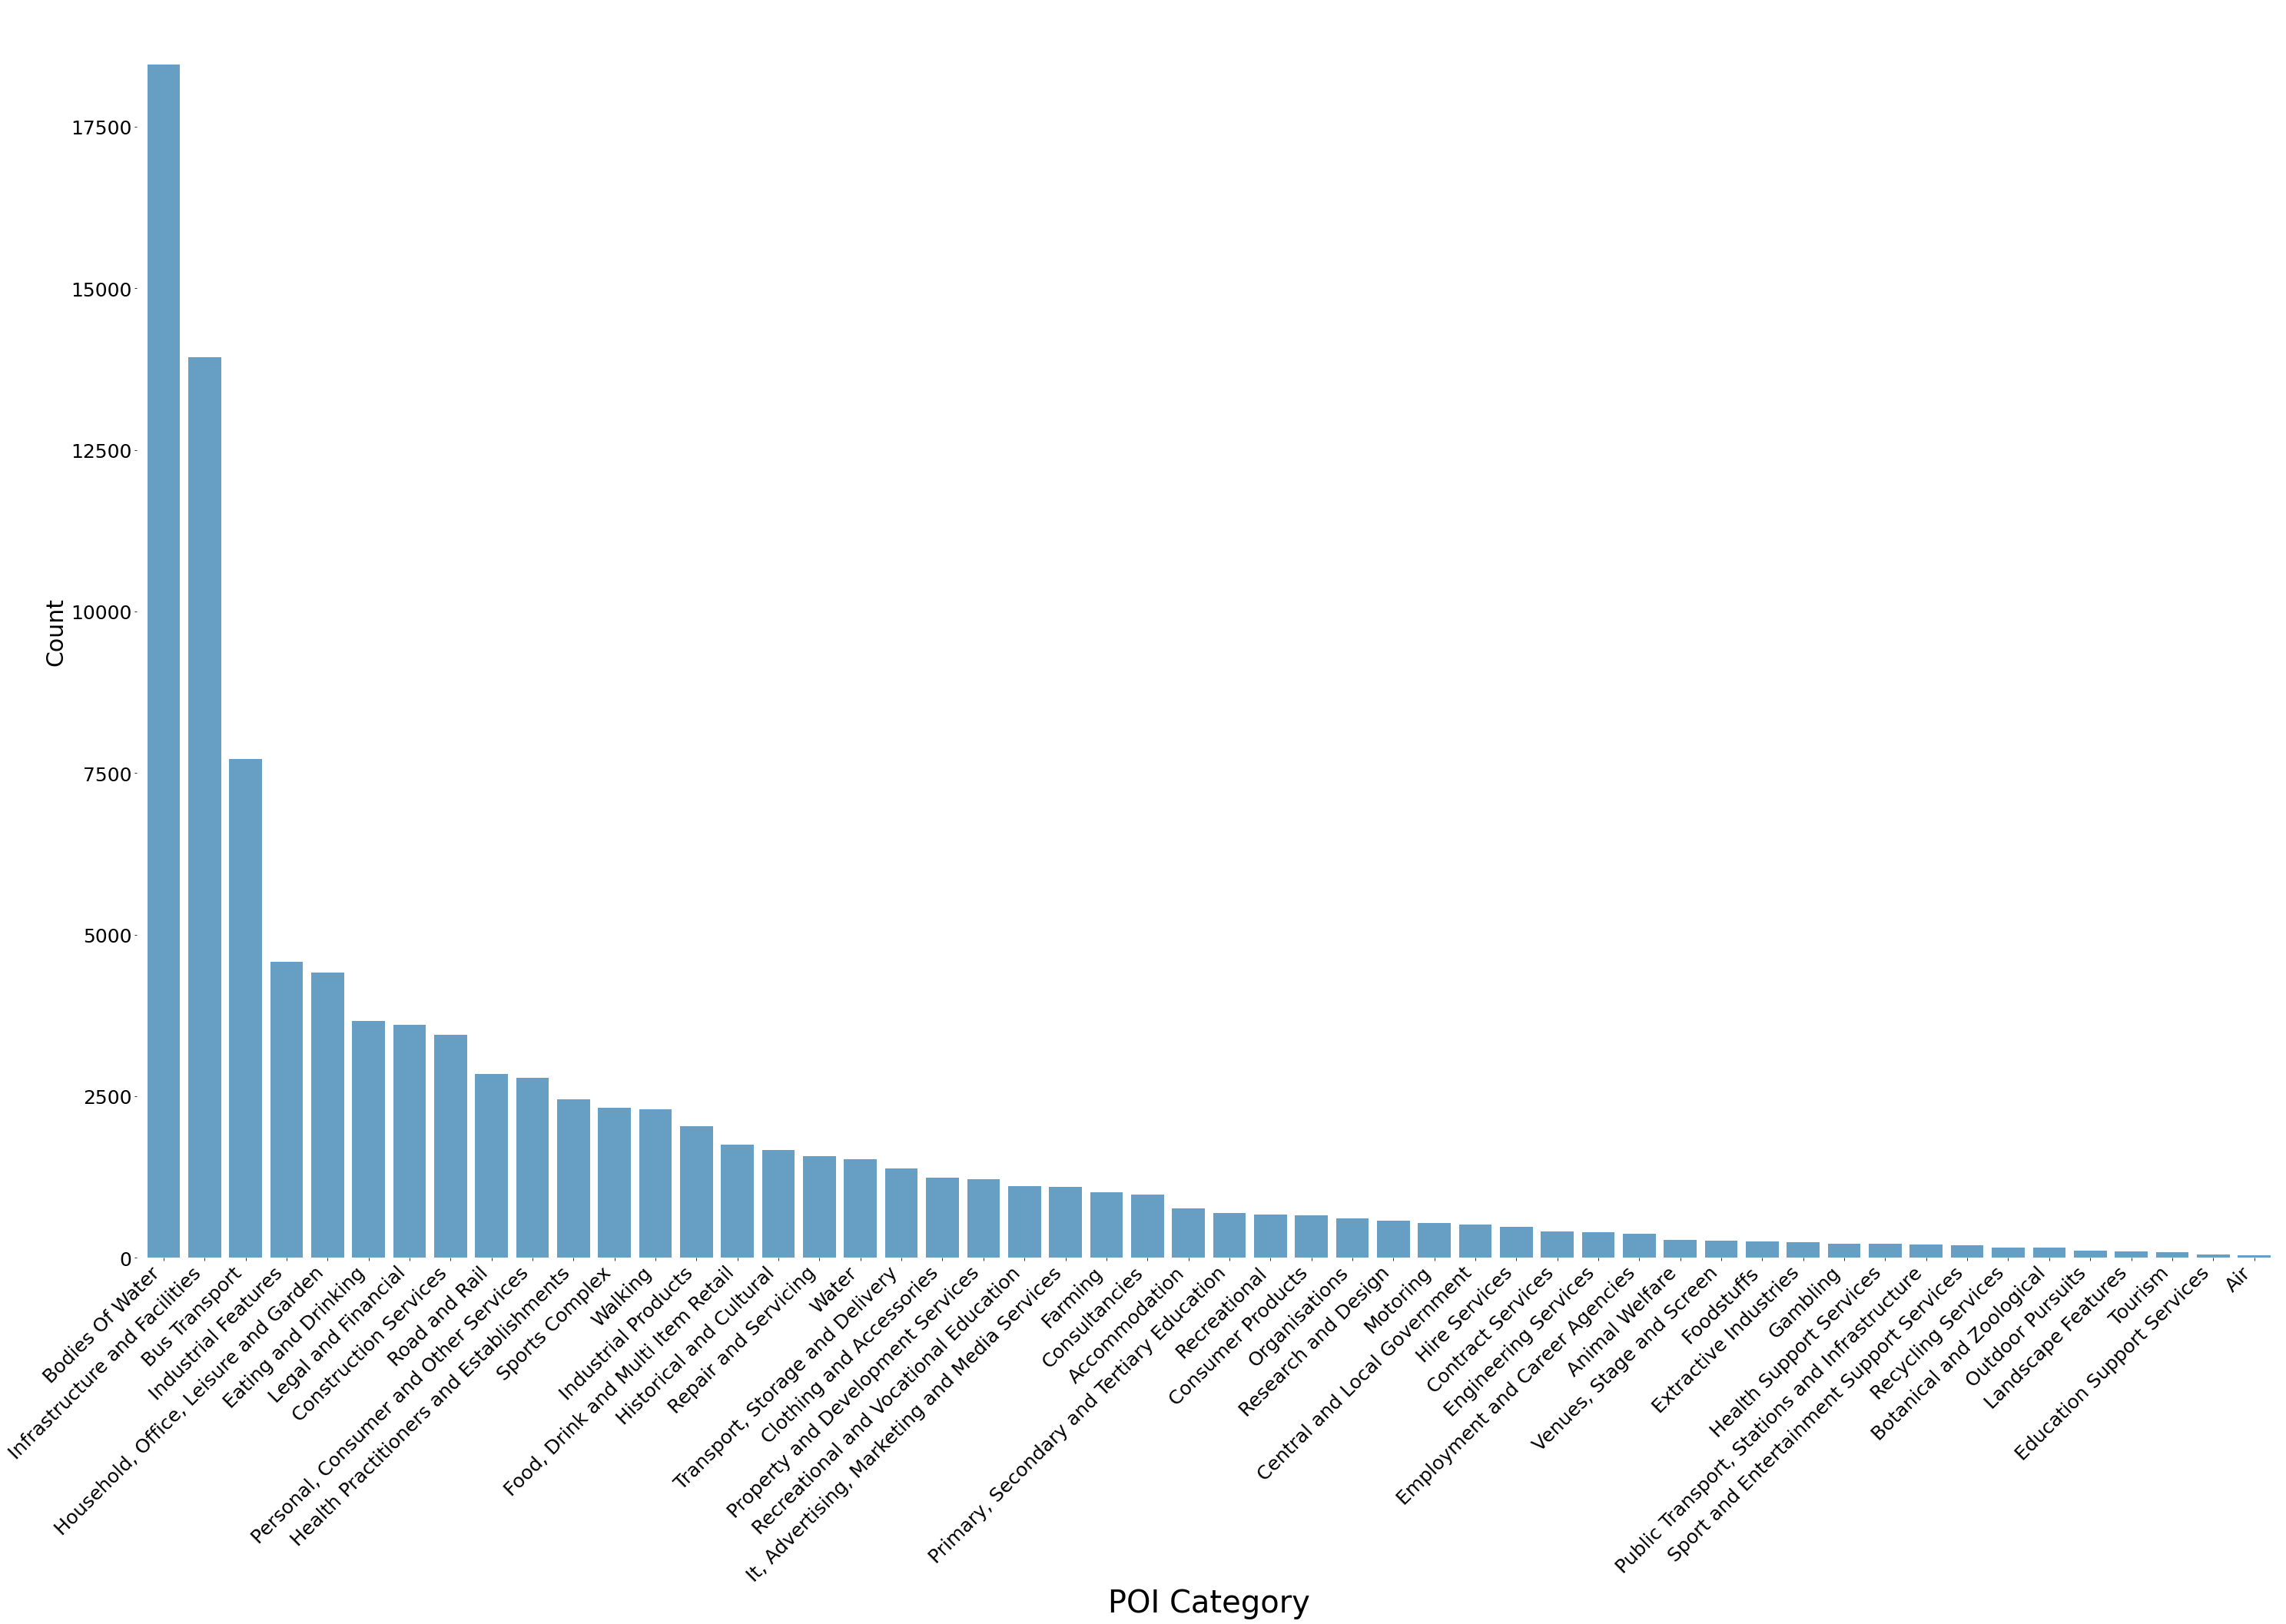

In [11]:
poi_2014_kent_sum_2 = pd.DataFrame(poi_2014_kent.groupby(["Level_1", "Level_2"])["name"].count()).reset_index()
poi_2014_kent_sum_2 = poi_2014_kent_sum_2.rename(columns={"name":"count_2014"})
poi_2014_kent_sum_2 = poi_2014_kent_sum_2.sort_values(by="count_2014", ascending=False)


fig, ax = plt.subplots(figsize =(50,30))
poi_2014_kent_sum_2.plot.bar(ax=ax, legend=False, width=0.8, color=("#669EC4"))
ax.set_xlabel("POI Category", fontsize=40)
ax.set_ylabel("Count", fontsize=30)
ax.set_xticklabels(poi_2014_kent_sum_2["Level_2"])
#ax.set_title(f"Descending Count of POI Level 2 Categories, September 2014", fontdict={'fontsize': '40','fontweight' : '10'}, pad=20) 
plt.xticks(fontsize=25, rotation=45, horizontalalignment='right')
plt.yticks(fontsize=25)

plt.savefig(os.path.join("Figures", 'bar_poi_2014_count_level2.png'), transparent=True, dpi=300)

In [12]:
# Create level 3 - don't plot, as useless graph 

poi_2014_kent_sum_3 = pd.DataFrame(poi_2014_kent.groupby(["Level_1", "Level_3"])["name"].count()).reset_index()
poi_2014_kent_sum_3 = poi_2014_kent_sum_3.rename(columns={"name":"count_2014"})
poi_2014_kent_sum_3 = poi_2014_kent_sum_3.sort_values(by="count_2014", ascending=False)

In [13]:
# Level 1

print("The top 5 Level 1 categories are: " + str(poi_2014_kent_sum_1.head(5)))
print(" ")
print(" ")
print("The bottom 5 Level 1 categories are: " + str(poi_2014_kent_sum_1.tail(5)))
print(" ")
print(" ")
print(" ")
print(" ")
print("The top 5 Level 2 categories are: " + str(poi_2014_kent_sum_2.head(5)))
print(" ")
print(" ")
print("The bottom 5 Level 2 categories are: " + str(poi_2014_kent_sum_2.tail(5)))
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print("The top 5 Level 3 categories are: " + str(poi_2014_kent_sum_3.head(5)))
print(" ")
print(" ")
print("The bottom 5 Level 3 categories are: " + str(poi_2014_kent_sum_3.tail(5)))

The top 5 Level 1 categories are:                         Level_1  count_2014
1                   Attractions       21138
2           Commercial Services       18458
5         Public Infrastructure       15047
8                     Transport       14614
4  Manufacturing and Production        8787
 
 
The bottom 5 Level 1 categories are:                               Level_1  count_2014
4        Manufacturing and Production        8787
6                              Retail        7942
3                Education and Health        4791
0  Accommodation, Eating and Drinking        4428
7             Sport and Entertainment        3117
 
 
 
 
The top 5 Level 2 categories are:                          Level_1                                Level_2  \
2                    Attractions                        Bodies Of Water   
35         Public Infrastructure          Infrastructure and Facilities   
47                     Transport                          Bus Transport   
32  Manufacturing a

1.2 Wrangle

In [14]:
# Set same CRS
poi_2014 = poi_2014_kent.to_crs(lsoa_2011.crs.to_string())

# Spatial join to get which points in which LSOA
poi_2014 = gpd.sjoin(lsoa_2011, poi_2014, how="left")

# Groupby LSOA
poi_2014_grouped = pd.DataFrame(poi_2014.groupby(["LSOA11CD", "Level_3"])["Level_3"].count())
poi_2014_grouped = poi_2014_grouped.rename(columns={"Level_3":"count"})
poi_2014_grouped = poi_2014_grouped.reset_index()

# Pivot
poi_2014_grouped = poi_2014_grouped.pivot(index="LSOA11CD", columns="Level_3", values="count")
poi_2014_grouped = poi_2014_grouped.reset_index()
poi_2014_grouped = pd.merge(poi_2014_grouped, (pd.DataFrame(poi_2014_grouped.groupby(["LSOA11CD"])["LSOA11CD"].count()).rename(columns={"LSOA11CD":"count_poi_2014"}).reset_index()), how="left", on="LSOA11CD")

# Fill nan (where there are no points)
poi_2014_grouped = poi_2014_grouped.fillna(0)

# Calculate sum
poi_2014_grouped["count_poi_2014"] = poi_2014_grouped.iloc[:, 1:-2].sum(axis = 1)


In [15]:
infodf(poi_2014_grouped)

There are 902 rows in the dataframe
There are 578 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'Abrasive Products and Grinding Equipment',
       'Access Equipment', 'Accident and Emergency Hospitals',
       'Accountants and Auditors', 'Adhesives and Sealants', 'Adult Shops',
       'Adult Venues', 'Advertising Services', 'Aeronautical Features',
       ...
       'Weirs, Sluices and Dams', 'Wifi Hotspots', 'Window Cleaners',
       'Wood Products Including Charcoal, Paper, Card and Board', 'Workwear',
       'X-Ray Services', 'Youth Accommodation', 'Youth Organisations',
       'Zoos and Animal Collections', 'count_poi_2014'],
      dtype='object', length=578)
There are 0 NaN values in the data frame
These NaN values are located in columns: []


In [16]:
# Clean column names

poi_2014_grouped.columns = poi_2014_grouped.columns.str.replace(' ','_')
poi_2014_grouped = poi_2014_grouped.rename(columns={c: c+'_2014' for c in poi_2014_grouped.columns if c not in ['LSOA11CD']or["count_poi_2014"]})
poi_2014_grouped = poi_2014_grouped.rename(columns={"LSOA11CD_2014":"LSOA11CD", "count_poi_2014_2014":"count_poi_2014"})

In [17]:
# Save

poi_2014_grouped.to_csv(os.path.join(nc, "poi_2014_cleaned.csv"))

# 2.1 2018

In [18]:
poi_2018_kent = gpd.read_file(os.path.join(nc, "poi_2018.gpkg"))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [19]:
infodf(poi_2018_kent)

There are 105158 rows in the dataframe
There are 33 columns in the data frame
The columns of the dataframe are: Index(['id', 'ref_no', 'name', 'pointx_class', 'groupname', 'categoryname',
       'classname', 'feature_easting', 'feature_northing', 'pos_accuracy',
       'uprn', 'topo_toid', 'topo_toid_version', 'itn_easting', 'itn_northing',
       'itn_toid', 'itn_toid_version', 'distance', 'address_detail',
       'street_name', 'locality', 'geographic_county', 'postcode',
       'verified_address', 'admin_boundary', 'telephone_number', 'url',
       'brand', 'qualifier_type', 'qualifier_data', 'provenance',
       'supply_date', 'geometry'],
      dtype='object')
There are 606189 NaN values in the data frame
These NaN values are located in columns: ['uprn', 'address_detail', 'street_name', 'locality', 'telephone_number', 'url', 'brand', 'qualifier_type', 'qualifier_data']


In [20]:
poi_2018_kent = poi_2018_kent.rename(columns={"groupname":"Level_1", "categoryname":"Level_2", "classname":"Level_3"})

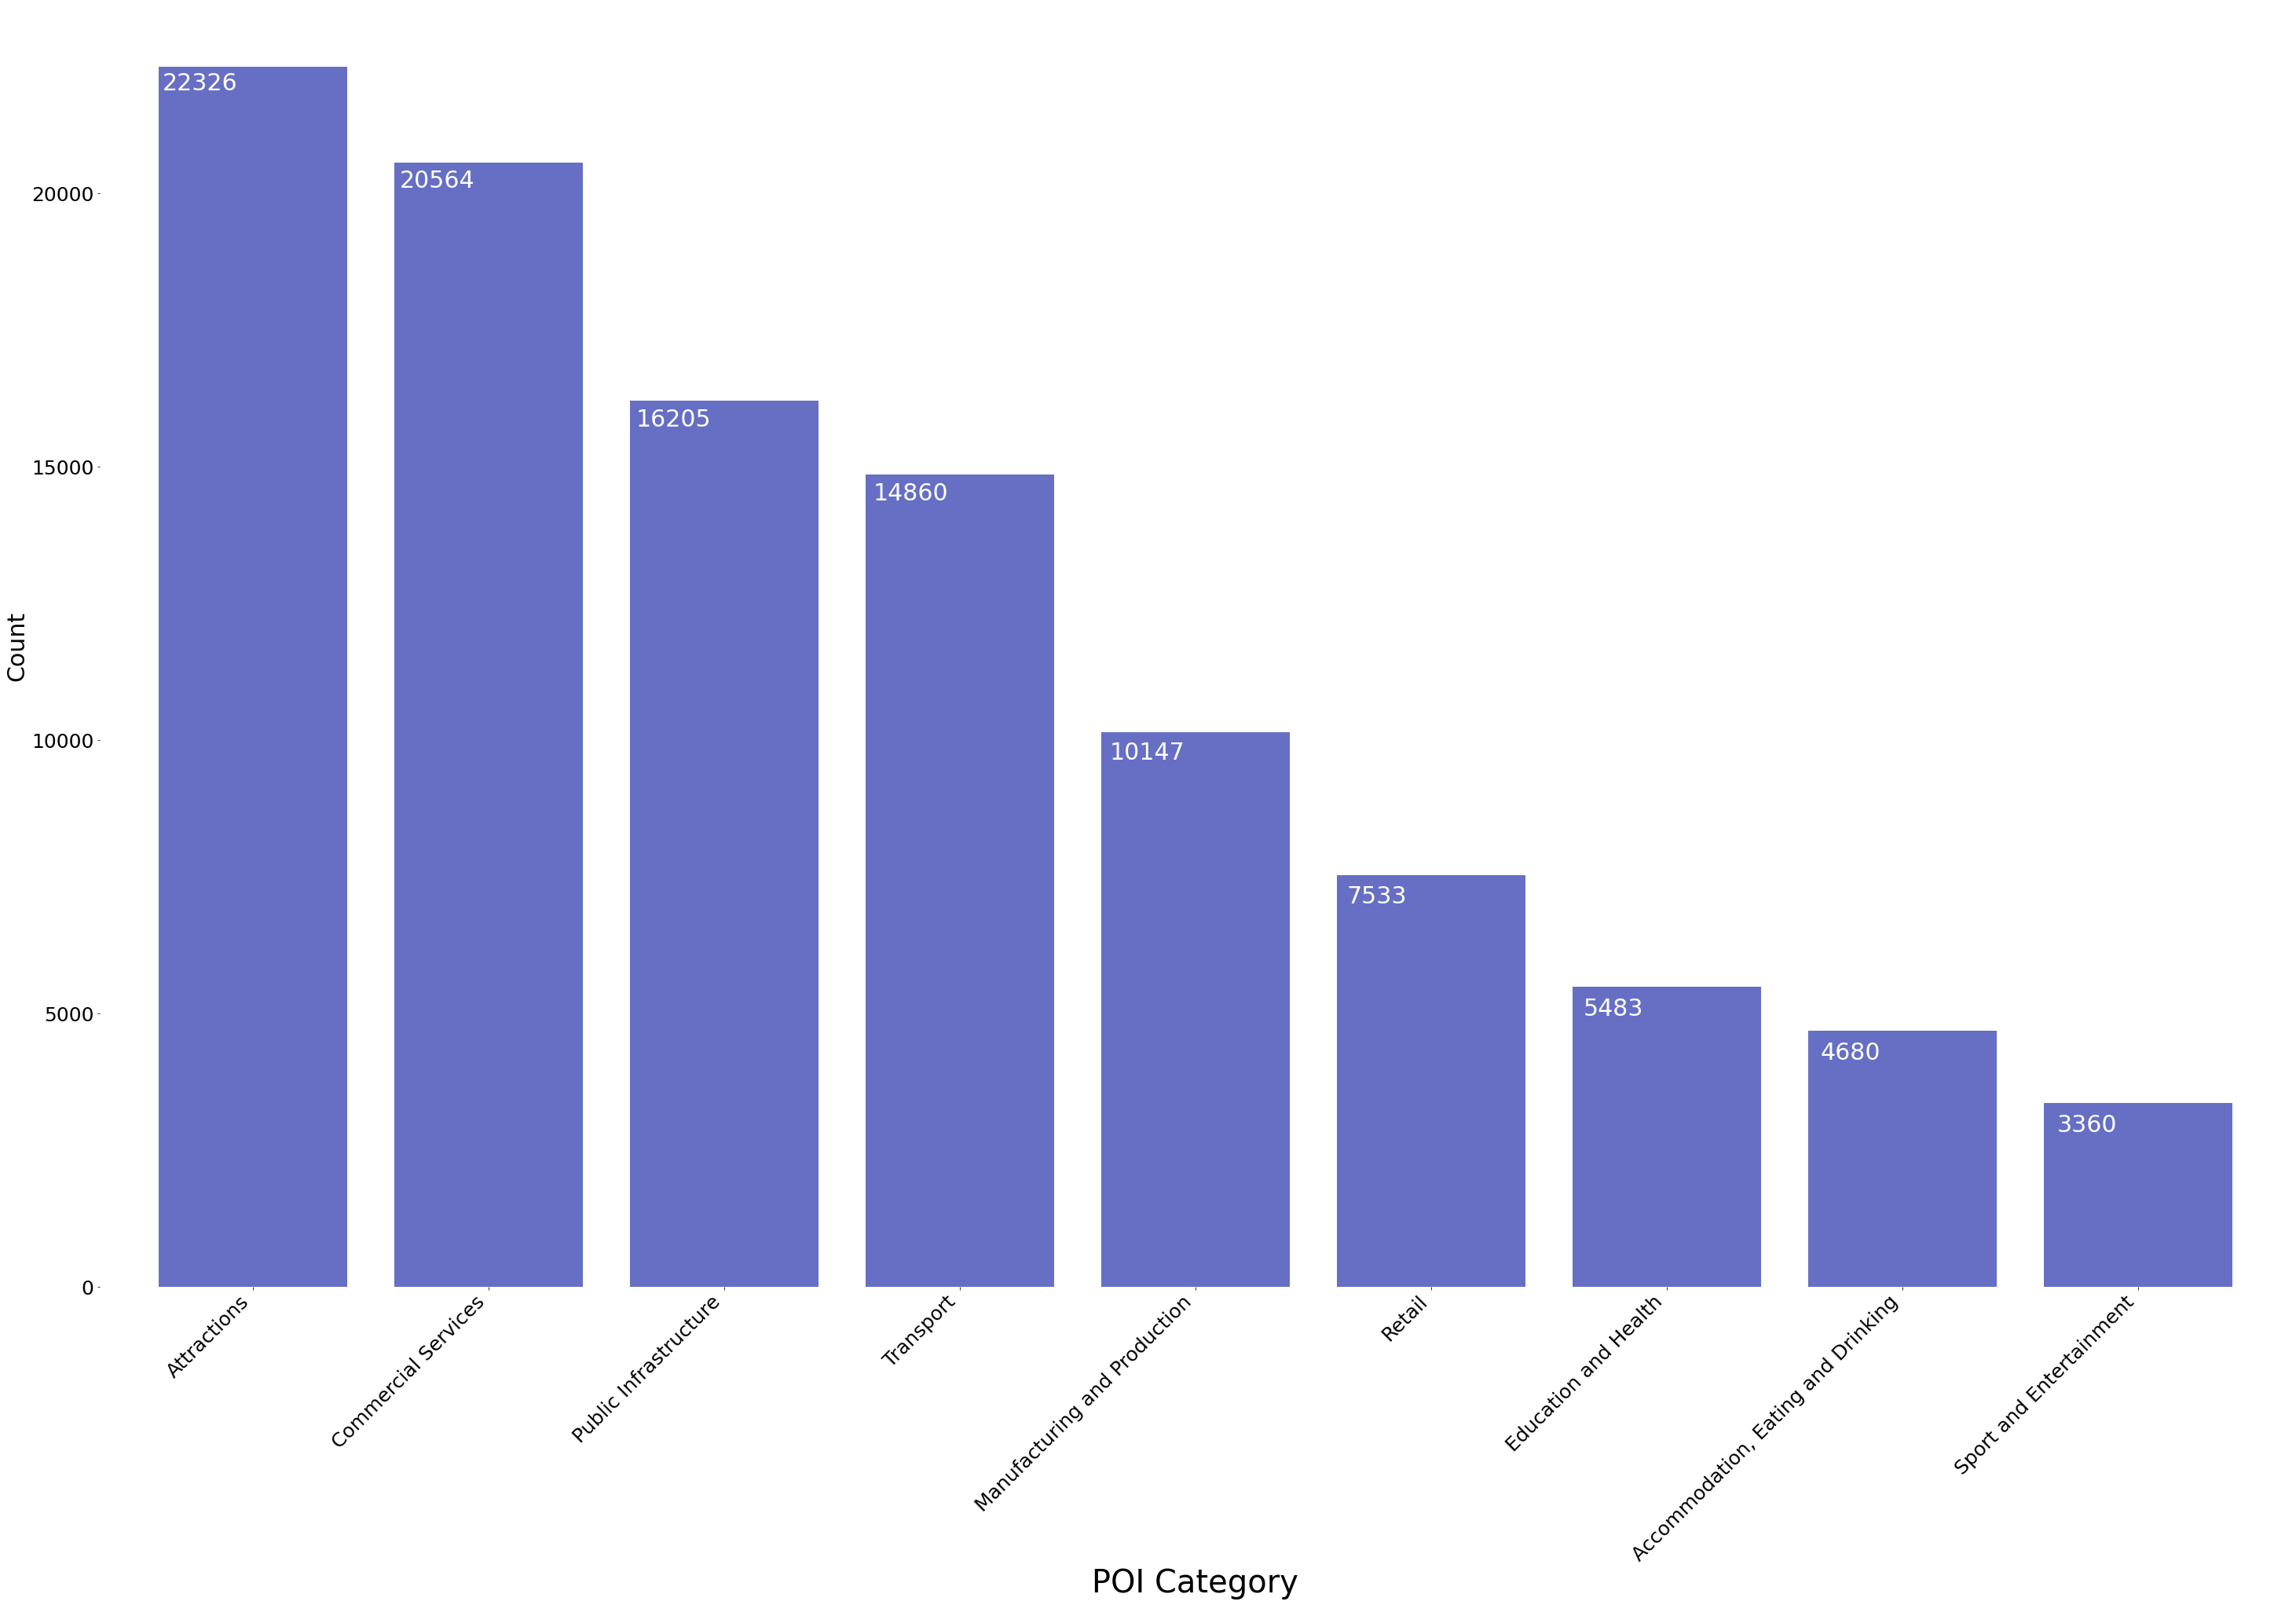

In [21]:
# Now lets explore it 

poi_2018_kent_sum_1 = pd.DataFrame(poi_2018_kent.groupby(["Level_1"])["name"].count()).reset_index()
poi_2018_kent_sum_1 = poi_2018_kent_sum_1.rename(columns={"name":"count_2018"})
poi_2018_kent_sum_1 = poi_2018_kent_sum_1.sort_values(by="count_2018", ascending=False)

fig, ax = plt.subplots(figsize =(50,30))
poi_2018_kent_sum_1.plot.bar(ax=ax, legend=False, width=0.8, color=("#666fc4"))
ax.set_xlabel("POI Category", fontsize=40)
ax.set_ylabel("Count", fontsize=30)
ax.set_xticklabels(poi_2014_kent_sum_1["Level_1"])
#ax.set_title(f"Descending Count of POI Level 1 Categories, September 2018", fontdict={'fontsize': '40','fontweight' : '10'}, pad=20) 
plt.xticks(fontsize=25, rotation=45, horizontalalignment='right')
plt.yticks(fontsize=25)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005+0.02, (p.get_height() * 1.005)-550), fontsize=30, color="white")

plt.savefig(os.path.join("Figures", 'bar_poi_2018_count_level1.png'), transparent=True, dpi=300)

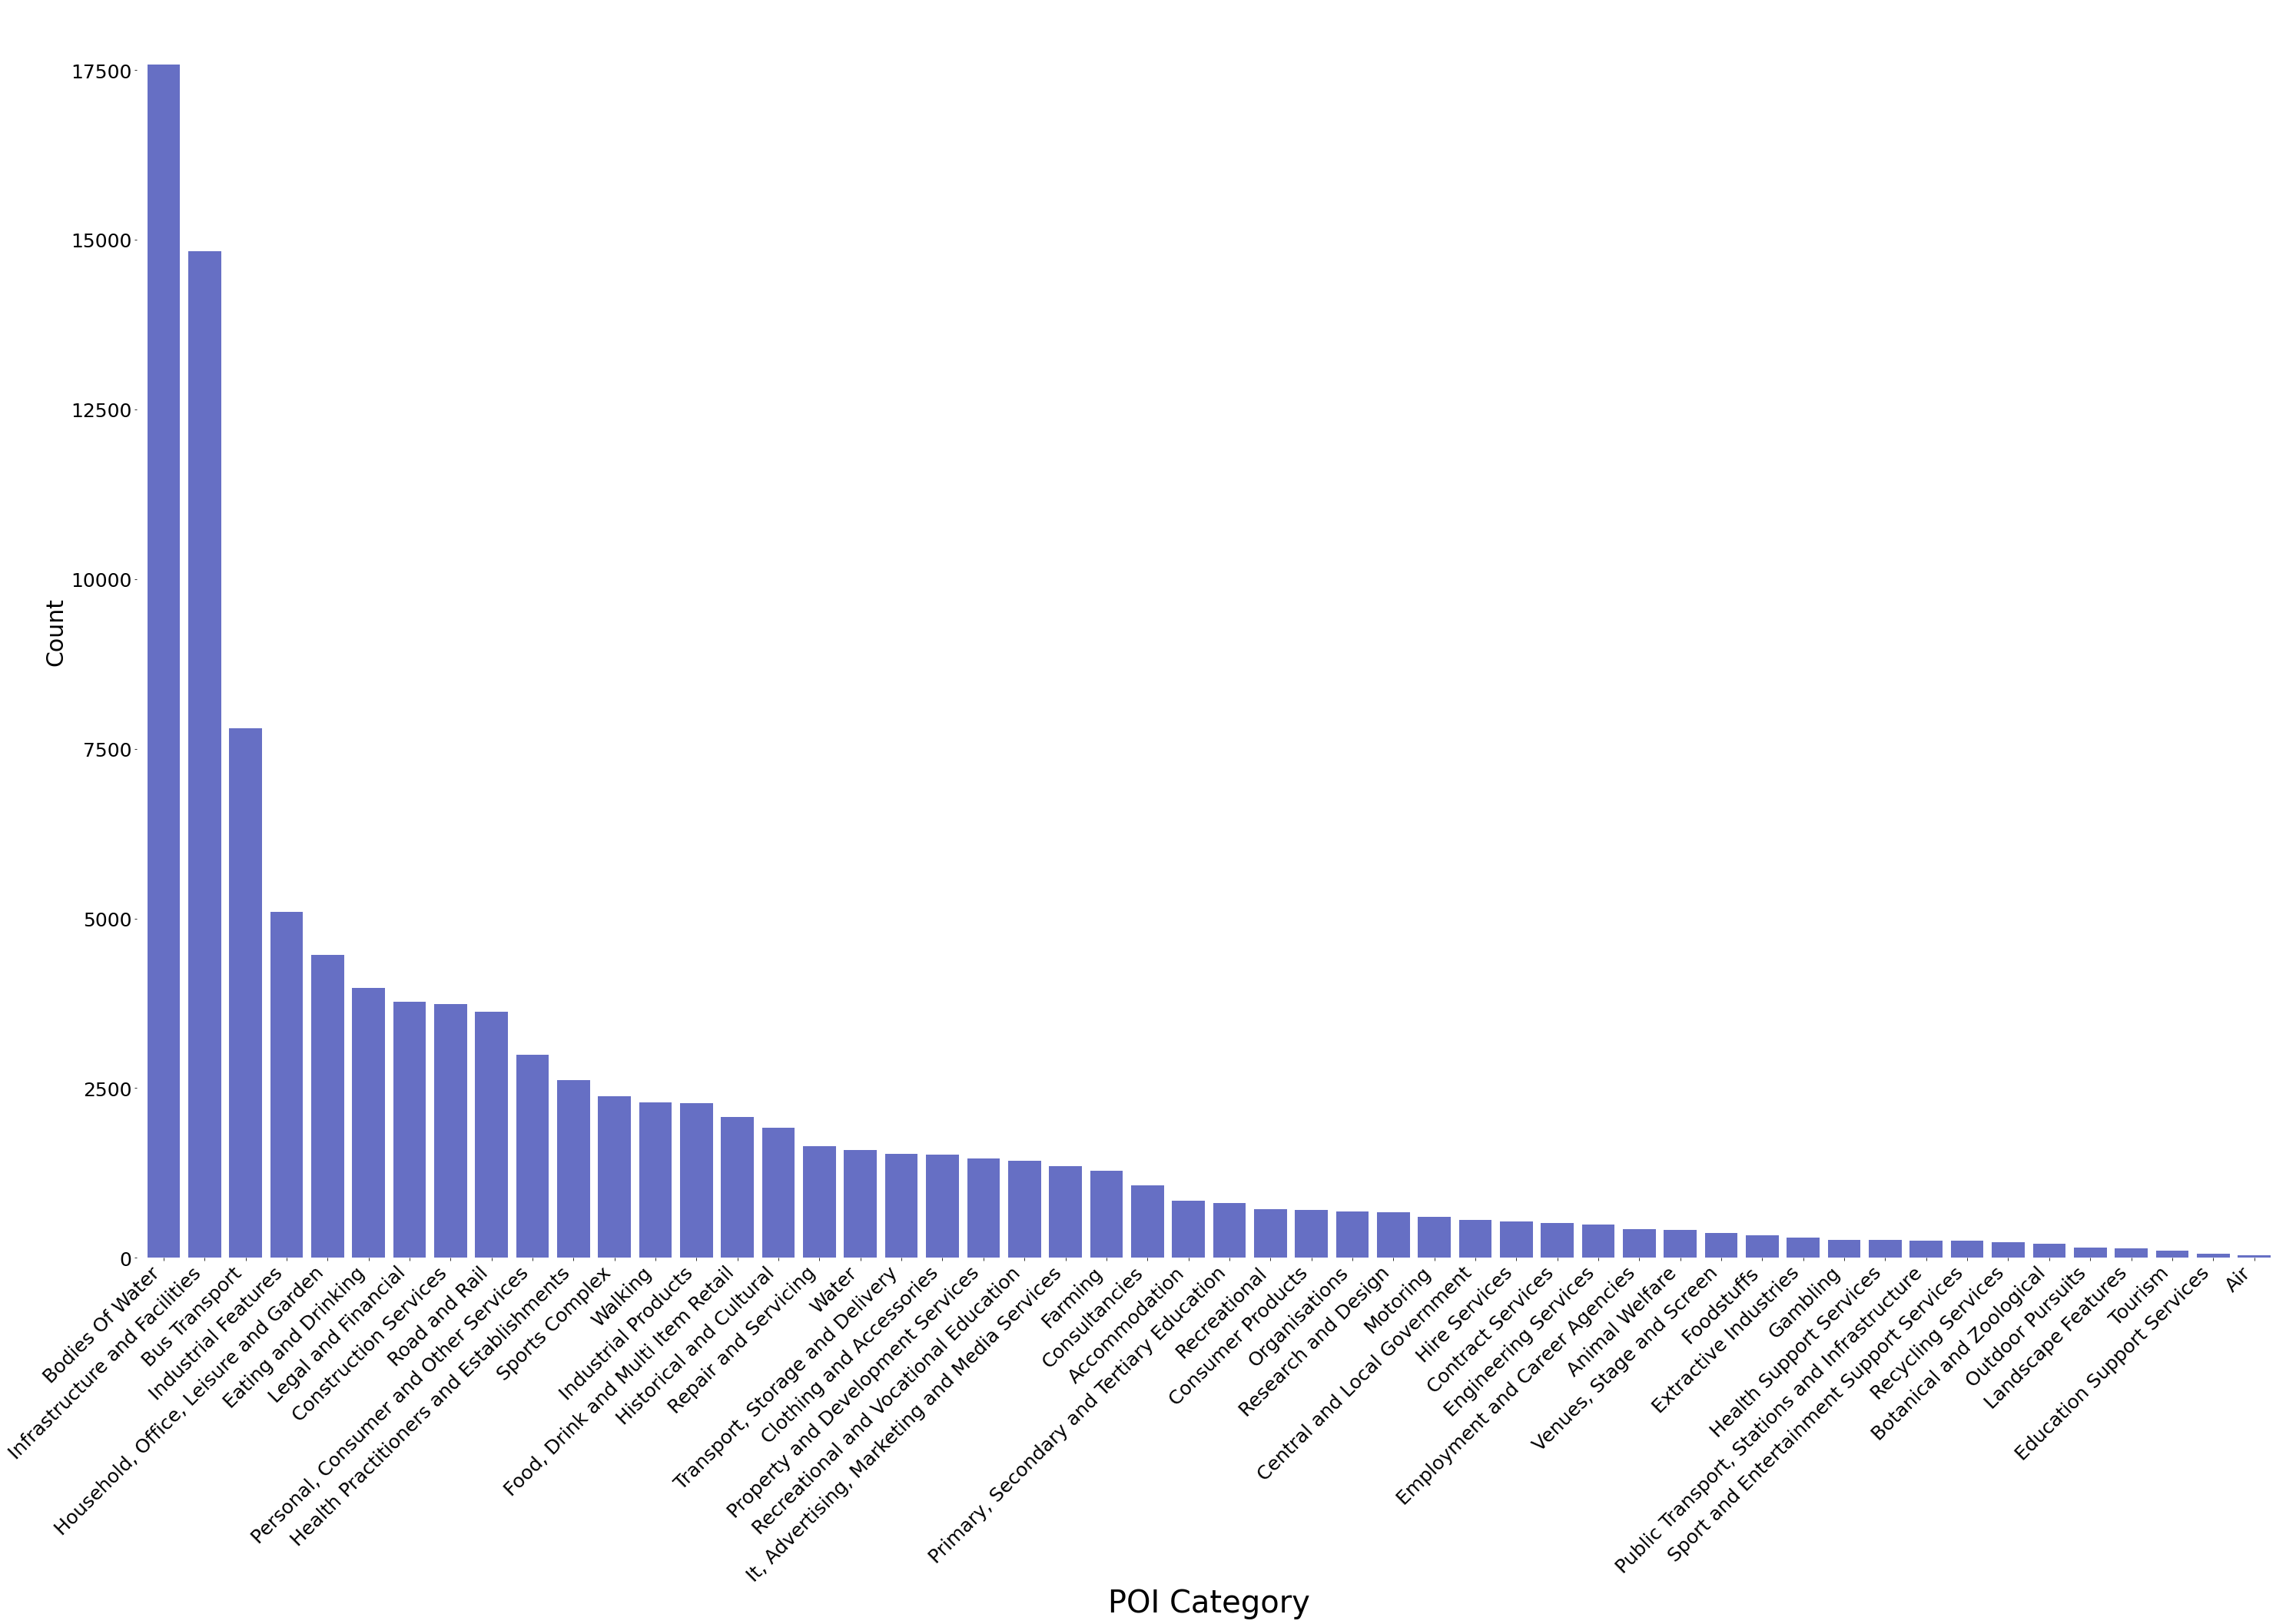

In [22]:
# Now lets explore it 

poi_2018_kent_sum_2 = pd.DataFrame(poi_2018_kent.groupby(["Level_1", "Level_2"])["name"].count()).reset_index()
poi_2018_kent_sum_2 = poi_2018_kent_sum_2.rename(columns={"name":"count_2018"})
poi_2018_kent_sum_2 = poi_2018_kent_sum_2.sort_values(by="count_2018", ascending=False)


fig, ax = plt.subplots(figsize =(50,30))
poi_2018_kent_sum_2.plot.bar(ax=ax, legend=False, width=0.8, color=("#666fc4"))
ax.set_xlabel("POI Category", fontsize=40)
ax.set_ylabel("Count", fontsize=30)
ax.set_xticklabels(poi_2014_kent_sum_2["Level_2"])
#ax.set_title(f"Descending Count of POI Level 2 Categories, September 2018", fontdict={'fontsize': '40','fontweight' : '10'}, pad=20) 
plt.xticks(fontsize=25, rotation=45, horizontalalignment='right')
plt.yticks(fontsize=25)

plt.savefig(os.path.join("Figures", 'bar_poi_count_2018_level2.png'), transparent=True, dpi=300)

In [23]:
# Create level 3 - don't plot, as useless graph 

poi_2018_kent_sum_3 = pd.DataFrame(poi_2018_kent.groupby(["Level_1", "Level_3"])["name"].count()).reset_index()
poi_2018_kent_sum_3 = poi_2018_kent_sum_3.rename(columns={"name":"count_2018"})
poi_2018_kent_sum_3 = poi_2018_kent_sum_3.sort_values(by="count_2018", ascending=False)

In [24]:
# Level 1

print("The top 5 Level 1 categories are: " + str(poi_2018_kent_sum_1.head(5)))
print(" ")
print(" ")
print("The bottom 5 Level 1 categories are: " + str(poi_2018_kent_sum_1.tail(5)))
print(" ")
print(" ")
print(" ")
print(" ")
print("The top 5 Level 2 categories are: " + str(poi_2018_kent_sum_2.head(5)))
print(" ")
print(" ")
print("The bottom 5 Level 2 categories are: " + str(poi_2018_kent_sum_2.tail(5)))
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print("The top 5 Level 3 categories are: " + str(poi_2018_kent_sum_2.head(5)))
print(" ")
print(" ")
print("The bottom 5 Level 3 categories are: " + str(poi_2018_kent_sum_2.tail(5)))


The top 5 Level 1 categories are:                         Level_1  count_2018
2           Commercial Services       22326
1                   Attractions       20564
5         Public Infrastructure       16205
8                     Transport       14860
4  Manufacturing and Production       10147
 
 
The bottom 5 Level 1 categories are:                               Level_1  count_2018
4        Manufacturing and Production       10147
6                              Retail        7533
3                Education and Health        5483
0  Accommodation, Eating and Drinking        4680
7             Sport and Entertainment        3360
 
 
 
 
The top 5 Level 2 categories are:                          Level_1                        Level_2  count_2018
2                    Attractions                Bodies Of Water       17582
35         Public Infrastructure  Infrastructure and Facilities       14828
47                     Transport                  Bus Transport        7803
32  Manufacturi

2.2 Wrangle

In [25]:
# Set same CRS
poi_2018 = poi_2018_kent.to_crs(lsoa_2011.crs.to_string())

# Spatial join to get which points in which LSOA
poi_2018 = gpd.sjoin(lsoa_2011, poi_2018, how="left")

# Groupby LSOA
poi_2018_grouped = pd.DataFrame(poi_2018.groupby(["LSOA11CD", "Level_3"])["Level_3"].count())
poi_2018_grouped = poi_2018_grouped.rename(columns={"Level_3":"count"})
poi_2018_grouped = poi_2018_grouped.reset_index()

# Pivot
poi_2018_grouped = poi_2018_grouped.pivot(index="LSOA11CD", columns="Level_3", values="count")
poi_2018_grouped = poi_2018_grouped.reset_index()
poi_2018_grouped = pd.merge(poi_2018_grouped, (pd.DataFrame(poi_2018_grouped.groupby(["LSOA11CD"])["LSOA11CD"].count()).rename(columns={"LSOA11CD":"count_poi_2018"}).reset_index()), how="left", on="LSOA11CD")

# Fill nan (where there are no points)
poi_2018_grouped = poi_2018_grouped.fillna(0)

# Calculate sum
poi_2018_grouped["count_poi_2018"] = poi_2018_grouped.iloc[:, 1:-2].sum(axis = 1)

In [26]:
x = pd.DataFrame(poi_2018_grouped["LSOA11CD"].to_list())
x.to_csv("lsoaslist.csv")

In [27]:
# Check difference between rows again

collist = poi_2018_grouped["LSOA11CD"].to_list()
collist2 = poi_2018["LSOA11CD"].to_list()

# Convert lists to sets
first_set = set(collist)
sec_set = set(collist2)
# Get the differences between two sets
differences = (first_set - sec_set).union(sec_set - first_set)
print('Differences between two lists: ')
print(differences)

Differences between two lists: 
set()


In [28]:
# Clean column names

poi_2018_grouped.columns = poi_2018_grouped.columns.str.replace(' ','_')
poi_2018_grouped = poi_2018_grouped.rename(columns={c: c+'_2018' for c in poi_2018_grouped.columns if c not in ['LSOA11CD']or["count_poi_2018"]})
poi_2018_grouped = poi_2018_grouped.rename(columns={"LSOA11CD_2018":"LSOA11CD", "count_poi_2018_2018":"count_poi_2018"})

In [29]:
# Save

poi_2018_grouped.to_csv(os.path.join(nc, "poi_2018_cleaned.csv"))

# 3. Calculate Change (All POI)


In [30]:
# Make spatial

poi_2014_gdf = pd.merge(lsoa_2011, poi_2014_grouped, on="LSOA11CD")
poi_2018_gdf = pd.merge(lsoa_2011, poi_2018_grouped, on="LSOA11CD")

In [31]:
# Save

poi_2014_gdf.to_file(os.path.join(nc, "poi_2014_gdf.shp"))
poi_2018_gdf.to_file(os.path.join(nc, "poi_2018_gdf.shp"))

/tmp/ipykernel_2092/341947811.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  poi_2014_gdf.to_file(os.path.join(nc, "poi_2014_gdf.shp"))
/tmp/ipykernel_2092/341947811.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  poi_2018_gdf.to_file(os.path.join(nc, "poi_2018_gdf.shp"))


In [32]:
# Read in outline 

outline = gpd.read_file(os.path.join(shapefiles, "KENT_OUTLINE.shp"))

NameError: name 'TwoSlopeNorm' is not defined

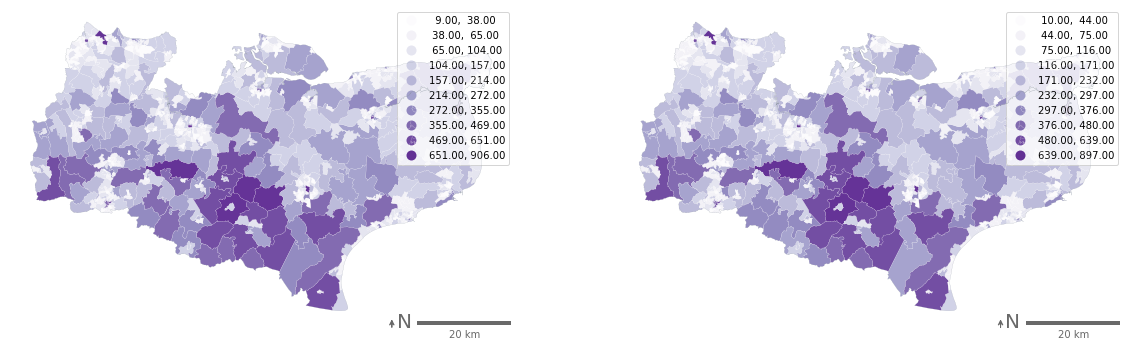

In [40]:
# Set axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_aspect('equal')
ax1.axis('off')

ax2.set_aspect('equal')
ax2.axis('off')

# Plot outlines of LSOA'S 
lsoa_2011.plot(ax=ax1, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)
lsoa_2011.plot(ax=ax2, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax1, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)
outline.plot(ax=ax2, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2011.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax1.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 
ax2.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax1.text(x=620000, y=113000,s='N', fontsize=20, color="dimgray")
ax2.text(x=620000, y=113000,s='N', fontsize=20, color="dimgray")

ax1.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")
ax2.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

# Plot Score
#poi_2014_gdf.plot(ax=ax1, column=poi_2014_gdf["count_poi_2014"], zorder=3, cmap="Purples", legend=True, scheme="user_Defined", alpha=0.8, classification_kwds=dict(bins=[38,65,104,157,214,272,355,471,651,906]))
poi_2014_gdf.plot(ax=ax1, column=poi_2014_gdf["count_poi_2014"], zorder=3, cmap="Purples", legend=True, scheme="FisherJenks", alpha=0.8, k=10)

# Plot score
#poi_2018_gdf.plot(ax=ax2, column=poi_2018_gdf["count_poi_2018"], zorder=3, cmap="Purples", legend=True, scheme="user_Defined", alpha=0.8, classification_kwds=dict(bins=[38,65,104,157,214,272,355,471,651,906]))
poi_2018_gdf.plot(ax=ax2, column=poi_2018_gdf["count_poi_2018"], zorder=3, cmap="Purples", legend=True, scheme="FisherJenks", alpha=0.8, k=10)

# normalize color
vmin, vmax, vcenter = poi_2014_gdf.count_poi_2014.min(), poi_2014_gdf.count_poi_2014.max(), poi_2014_gdf.count_poi_2014.median()
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = 'Purples'
cbar1 = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# # normalize color
# import matplotlib.colors.TwoSlopeNorm as TwoSlopeNorm
# vmin, vmax, vcenter = poi_2018_gdf.count_poi_2018.min(), poi_2018_gdf.count_poi_2018.max(), poi_2018_gdf.count_poi_2018.median()
# norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# # create a normalized colorbar
# cmap = 'Purples'
# cbar2 = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig.colorbar(cbar2, ax=ax2, fraction=0.036, pad=0.04)
fig.colorbar(cbar1, ax=ax1, fraction=0.036, pad=0.04)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_count_poi_2014_2018.png'), transparent=True, dpi=300)

# Show map
plt.show()

# 3.2 Plot Change

In [41]:
# Merge

change_df = pd.merge(poi_2018_grouped, poi_2014_grouped, on="LSOA11CD")

In [42]:
# Make spatial

change_df = pd.merge(lsoa_2011, change_df, on="LSOA11CD")

In [43]:
# Calculate change 

change_df["change"] = 100*((change_df["count_poi_2018"]-change_df["count_poi_2014"])/change_df["count_poi_2014"])

NameError: name 'TwoSlopeNorm' is not defined

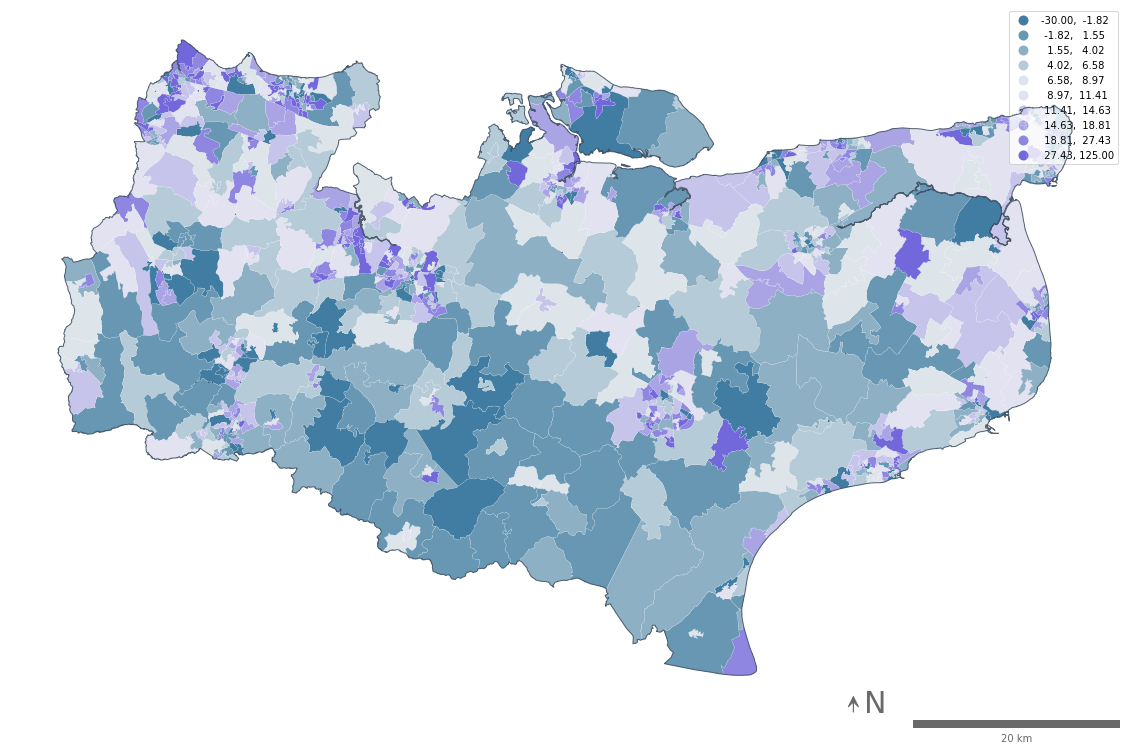

In [45]:
##### Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
lsoa_2011.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2011.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

# Plot Score
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)

change_df.plot(ax=ax, column=change_df["change"], zorder=3, cmap=cmap, scheme="quantiles" , k=10, legend=True)

# normalize color
vmin, vmax, vcenter = change_df.change.min(), change_df.change.max(), change_df.change.median()
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = cmap
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig.colorbar(cbar, ax=ax, fraction=0.036, pad=0.04)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_poi_change.png'), transparent=True, dpi=300)

# Show map
plt.show()